# k-means(k-평균) 군집 알고리즘

<img src = "./image/kmeans.png">

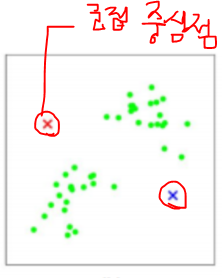

- 작동 방식
  1. 무작위로 k개의 클러스터 중심을 정함(b)
  2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정 (c, e)
  3. 클러스터에 속한 샘플의 평균갑승로 클러스터 중심변경 (d,f)
  4. 클러스터 중심에 변화가 없을 때까지 2 ~ 3 번과정 반복

In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
fruits = np.load("./data/fruits_300.npy")

In [4]:
fruits_2d = fruits.reshape(-1, 100 * 100)

In [19]:
fruits_2d

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(300, 10000), dtype=uint8)

In [20]:
fruits_2d.shape

(300, 10000)

In [21]:
km  = KMeans(n_clusters = 3, random_state = 33)
km.fit(fruits_2d) # 2차원 데이터만 받을수있어용~

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=33)

In [22]:
# 메모리 누수가 있으나...예

In [23]:
# 군집 결과 확인(각 샘플이 어떤 레이블에 해당되는지)
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


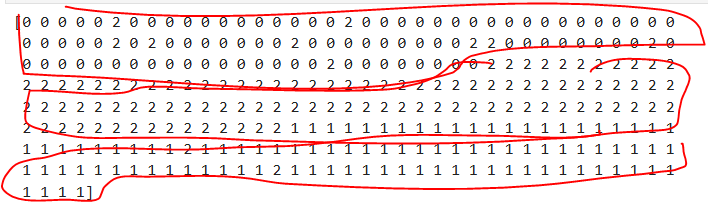

- 레이블 값에는 아무런 의미가 없음
- 각 레이블이 어떤 과일을 의미하는지 알아보려면 이미지 확인

In [24]:
# 각 레이블로 모인 샘플 개수 확인
print(np.unique(km.labels_, return_counts = True))

(array([0, 1, 2], dtype=int32), array([ 91,  98, 111]))


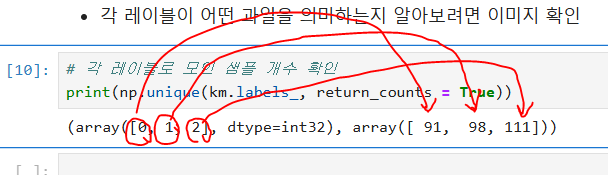

# 함수로 이미지 출력할래

In [25]:
def draw_fruits(arr, ratio = 1):
    n = len(arr) # 샘플 수

    # 한줄에 10개씩 이미지를 그릴 때, 몇 개 행이 필요할 지 행 개수 계산
    rows = int(np.ceil(n/10))
    cols = 10

    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio), squeeze = False)

    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap = "gray_r")
            axs[i,j].axis("off")

    plt.show()

# 0 번 군집 시각화

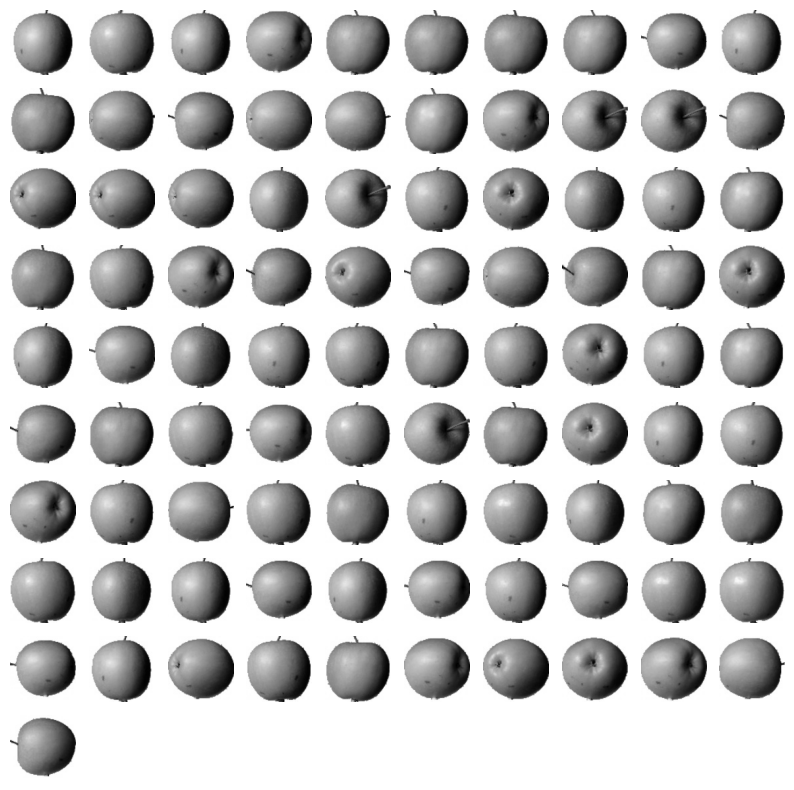

In [16]:
draw_fruits(fruits[km.labels_== 0])

# 1 번 군집 시각화¶

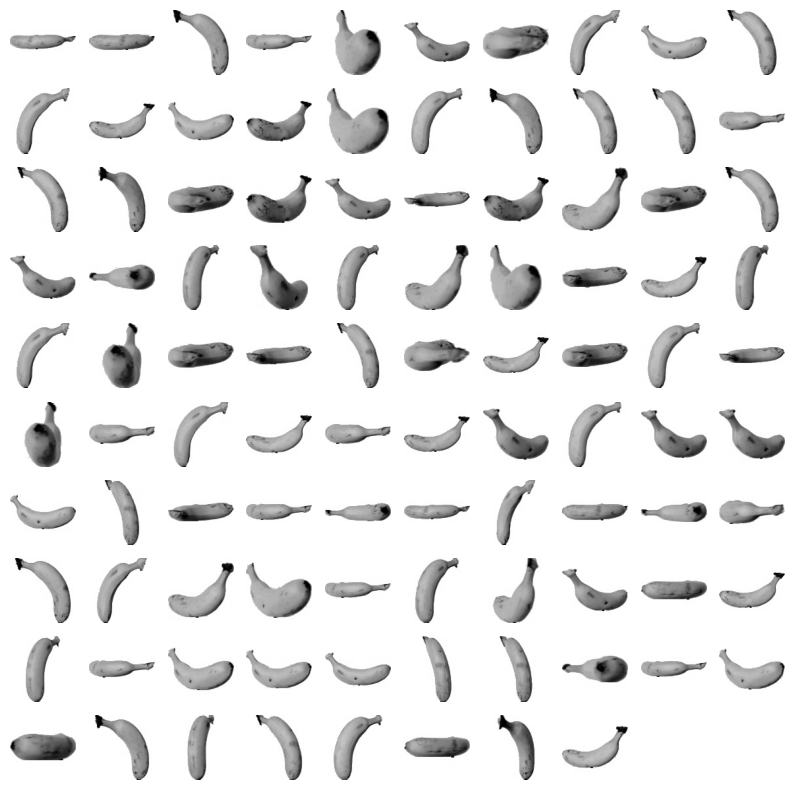

In [26]:
draw_fruits(fruits[km.labels_== 1])

## 클러스터 중심

- KMeans 가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장됨

- transform 메서드를 이용하면 입력데이터로부터 각 클러스터 중심까지의 거리를 계산할 수 있음

- predict 메서드는 가장 가까운 클러스터를 예측 클래스로 출력

- KMeans 가 반복학습한 횟수는 n_iter_ 속성에 저장됨

In [28]:
km.cluster_centers_

array([[1.01098901, 1.01098901, 1.01098901, ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]], shape=(3, 10000))

# 군집 중심점을 시각화???

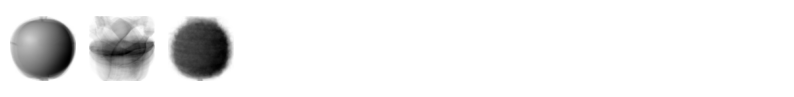

In [31]:
draw_fruits(km.cluster_centers_.reshape(-1, 100,100))

In [32]:
km.transform(fruits_2d[[100]])

array([[5267.70439881, 8837.37750892, 3393.8136117 ]])

In [34]:
km.predict(fruits_2d[[100]])

array([2], dtype=int32)

- 2번군집(파인애플)과 유사하구나~~~

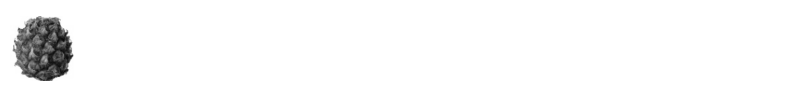

In [36]:
draw_fruits(fruits[[100]])

- 파인애플이 맞았습니다

In [37]:
km.n_iter_

4

## 최적의 k 찾기

- 현재 예제에서는 과일이 몇 종류 있는지 알고 있었기 때문에 클러스터 개수 3개로 지정함
- 실전에서는 몇개로 나눠야할까?

- elbow 기법
- 적절한 k값을 찾기 위한 대표적인 방법
    - inertia(이너셔): 각 샘플과 클러스터 중심 사이의 거리의 제곱합
        - 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지 나타내는 값
        - 일반적으로 클러스터의 개수가 늘어나면 이너셔 줄어듦
    - elbow 기법은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 찾는 방법
    - 클러스터 개수 증가 시키면서 그래프로 그리면 이너셔의 감소속도가 크게 변화하는 지점이 있음
    - 이 지점 이후로는 클러스터 개수를 느려도 이너셔 크게 개선 안됨
    - 변곡점!!! 이 클러스터 개수

In [38]:
inertia = []

for k in range(2, 7):
    km = KMeans(n_clusters= k, random_state =33)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

# 시각화

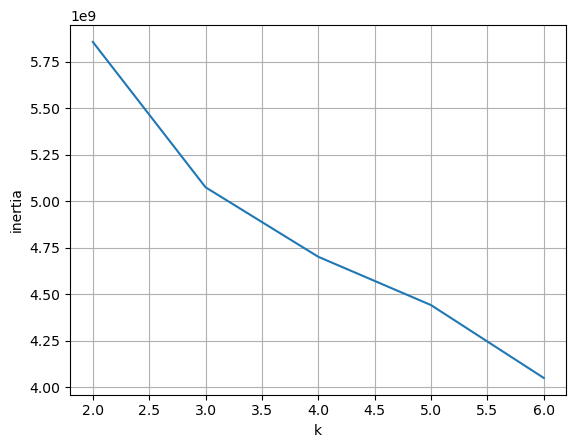

In [41]:
plt.plot(range(2,7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.grid()
plt.show()

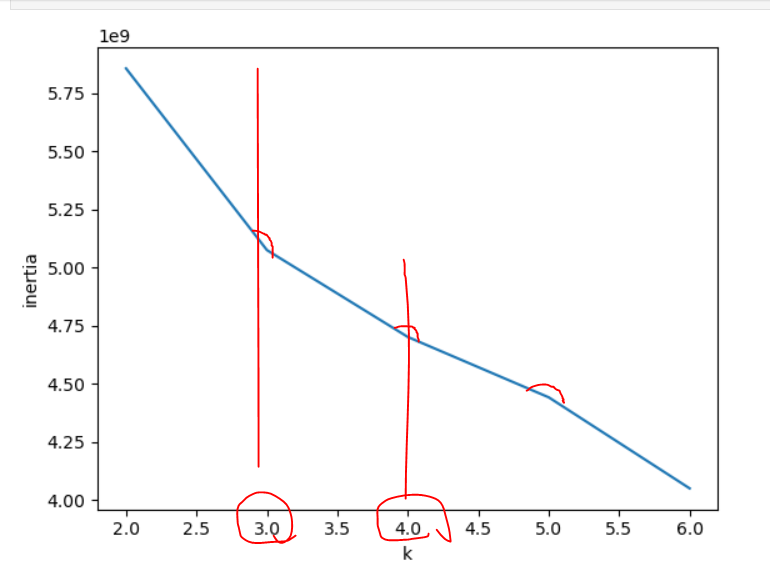

- 미묘하다 하지만 강사님은 k가 3 일때 최적이라고 판단